In [18]:
import torch
import torch.nn as nn
import os
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from PIL import Image
import torch.nn.functional as F
import torch.optim as optim
# import i2v
import numpy as np
import matplotlib.pyplot as plt

## 模型搭建

In [13]:
# class Net1(torch.nn.Module):
#     def __init__(self):
#         super(Net1,self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
#         self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
#         self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
#         self.pooling1 = torch.nn.MaxPool2d(2)
#         self.pooling2 = torch.nn.MaxPool2d(4)
#         self.fc1 = torch.nn.Linear(4096,4096)
#         self.fc2 = torch.nn.Linear(4096,4096)
#         self.fc3 = torch.nn.Linear(4096,7)
    
#     def forward(self,x):
#         batch_size = x.size(0)
#         x = self.pooling1(F.relu(self.conv1(x)))
#         x = self.pooling2(F.relu(self.conv2(x)))
#         x = self.pooling2(F.relu(self.conv3(x)))
#         # flatten
#         x = x.view(batch_size, -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [14]:
# class Net2(torch.nn.Module):
#     def __init__(self):
#         super(Net2,self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
#         self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
#         self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
#         self.conv4 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
#         self.pooling1 = torch.nn.MaxPool2d(2)
#         self.pooling2 = torch.nn.MaxPool2d(4)
#         self.fc1 = torch.nn.Linear(4096,4096)
#         self.fc2 = torch.nn.Linear(4096,4096)
#         self.fc3 = torch.nn.Linear(4096,7)
    
#     def forward(self,x):
#         batch_size = x.size(0)
#         x = self.pooling1(F.relu(self.conv1(x)))
#         x = self.pooling2(F.relu(self.conv2(x)))
#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         x = self.pooling2(x)
#         # flatten
#         x = x.view(batch_size, -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [15]:
# class Net3(torch.nn.Module):
#     def __init__(self):
#         super(Net3,self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
#         self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
#         self.conv3 = torch.nn.Conv2d(128,128,kernel_size=3,padding=1)
#         self.conv4 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
#         self.conv5 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
#         self.pooling1 = torch.nn.MaxPool2d(2)
#         self.pooling2 = torch.nn.MaxPool2d(4)
#         self.fc1 = torch.nn.Linear(4096,4096)
#         self.fc2 = torch.nn.Linear(4096,4096)
#         self.fc3 = torch.nn.Linear(4096,7)
    
#     def forward(self,x):
#         batch_size = x.size(0)
#         x = self.pooling1(F.relu(self.conv1(x)))
#         x = F.relu(self.conv2(x))
#         x = F.relu(self.conv3(x))
#         x = self.pooling2(x)
#         x = F.relu(self.conv4(x))
#         x = F.relu(self.conv5(x))
#         x = self.pooling2(x)
#         # flatten
#         x = x.view(batch_size, -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [16]:
# Ensemble模型
class Net1_mix(torch.nn.Module):
    def __init__(self):
        super(Net1_mix,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.pooling2 = torch.nn.MaxPool2d(4)
        self.fc1 = torch.nn.Linear(4096,4096)
        self.fc2 = torch.nn.Linear(4096,4096)
    
    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling1(F.relu(self.conv1(x)))
        x = self.pooling2(F.relu(self.conv2(x)))
        x = self.pooling2(F.relu(self.conv3(x)))
        # flatten
        x = x.view(batch_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
class Net2_mix(torch.nn.Module):
    def __init__(self):
        super(Net2_mix,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.conv4 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.pooling2 = torch.nn.MaxPool2d(4)
        self.fc1 = torch.nn.Linear(4096,4096)
        self.fc2 = torch.nn.Linear(4096,4096)
    
    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling1(F.relu(self.conv1(x)))
        x = self.pooling2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pooling2(x)
        # flatten
        x = x.view(batch_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
class Net3_mix(torch.nn.Module):
    def __init__(self):
        super(Net3_mix,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = torch.nn.Conv2d(128,128,kernel_size=3,padding=1)
        self.conv4 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.conv5 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.pooling2 = torch.nn.MaxPool2d(4)
        self.fc1 = torch.nn.Linear(4096,4096)
        self.fc2 = torch.nn.Linear(4096,4096)
    
    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pooling2(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pooling2(x)
        # flatten
        x = x.view(batch_size, -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
# 声明网络
model_net1 = Net1_mix()
model_net2 = Net2_mix()
model_net3 = Net3_mix()
# 导入参数
save_path = '..//Final-Project//model_save//'
state_dict1 = torch.load(save_path+"Net1_epoch10.pth")
state_dict2 = torch.load(save_path+"Net2_epoch10.pth")
state_dict3 = torch.load(save_path+"Net3_epoch5.pth")

keys = []
for k,v in state_dict1.items():
  #将‘fc3’开头的key过滤掉，这里是要去除的层的key
    if k.startswith('fc3'):  
        continue
    keys.append(k)

# 去除指定层后的模型
state_dict1 = {k:state_dict1[k] for k in keys}

keys = []
for k,v in state_dict2.items():
  #将‘fc3’开头的key过滤掉，这里是要去除的层的key
    if k.startswith('fc3'):  
        continue
    keys.append(k)
# 去除指定层后的模型
state_dict2 = {k:state_dict2[k] for k in keys}

keys = []
for k,v in state_dict3.items():
  #将‘fc3’开头的key过滤掉，这里是要去除的层的key
    if k.startswith('fc3'):  
        continue
    keys.append(k)

# 去除指定层后的模型
state_dict3 = {k:state_dict3[k] for k in keys}

#自己定义的模型，但要保证前面保存的层和自定义的模型中的层一致
model_net1.load_state_dict(state_dict1)
model_net2.load_state_dict(state_dict2)
model_net3.load_state_dict(state_dict3)

class NetMix(torch.nn.Module):
    def __init__(self):
        super(NetMix,self).__init__()
        self.net1 = model_net1
        self.net2 = model_net2
        self.net3 = model_net3
        for p in self.parameters():
            p.requires_grad = False #预训练模型加载进来后全部设置为不更新参数，然后再后面加层
        self.fc = torch.nn.Linear(4096*3,7)
    
    def forward(self,x):
        batch_size = x.size(0)
        x1 = self.net1(x)
        x2 = self.net2(x)
        x3 = self.net3(x)
        # 拼接输入
        x = torch.cat((x1,x2,x3),dim = 1)
        # 输出
        x = self.fc(x)
        return x

## 模型配置

### Net1配置

In [32]:
# model = Net1()

### Net2配置

In [16]:
# model = Net2()

### Net3配置

In [17]:
# model = Net3()

### Net1+2+3配置

In [18]:
model = NetMix()

In [3]:
# 作图（n epochs）
def plot_loss_n(n):
    # 1.创建画布
#     plt.figure(figsize=(10,8),dpi=100)
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8),dpi=100)

    # 2.绘制图像
    epochs = np.linspace(1,n,n)
#     train_loss = epochs
#     test_loss = epochs + 10
#     train_accuracy = epochs + 10
#     test_accuracy = epochs
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel("loss(CE)/patch")
    axes[0].set_title("loss", fontsize=10)
    axes[0].plot(epochs, train_loss_list[:n], color = 'r',label="train_loss")
    axes[0].plot(epochs, test_loss_list[:n], color = 'b',label="test_loss")
    axes[0].legend(loc="best")
    
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel("accuracy(%)")
    axes[1].set_title("accuracy", fontsize=10)
    axes[1].plot(epochs, train_accuracy_list[:n], color = 'r',label="train_accuracy")
    axes[1].plot(epochs, test_accuracy_list[:n], color = 'b',label="test_accuracy")
    axes[1].legend(loc="best")
    
    plt.show()     #显示图片

## 加载

In [5]:
train_loss_list = np.loadtxt("..//Final-Project//log_save//Netmix_train_loss_list.txt")
test_loss_list = np.loadtxt("..//Final-Project//log_save//Netmix_test_loss_list.txt")
train_accuracy_list = np.loadtxt("..//Final-Project//log_save//Netmix_train_accuracy_list.txt")
test_accuracy_list = np.loadtxt("..//Final-Project//log_save//Netmix_test_accuracy_list.txt")

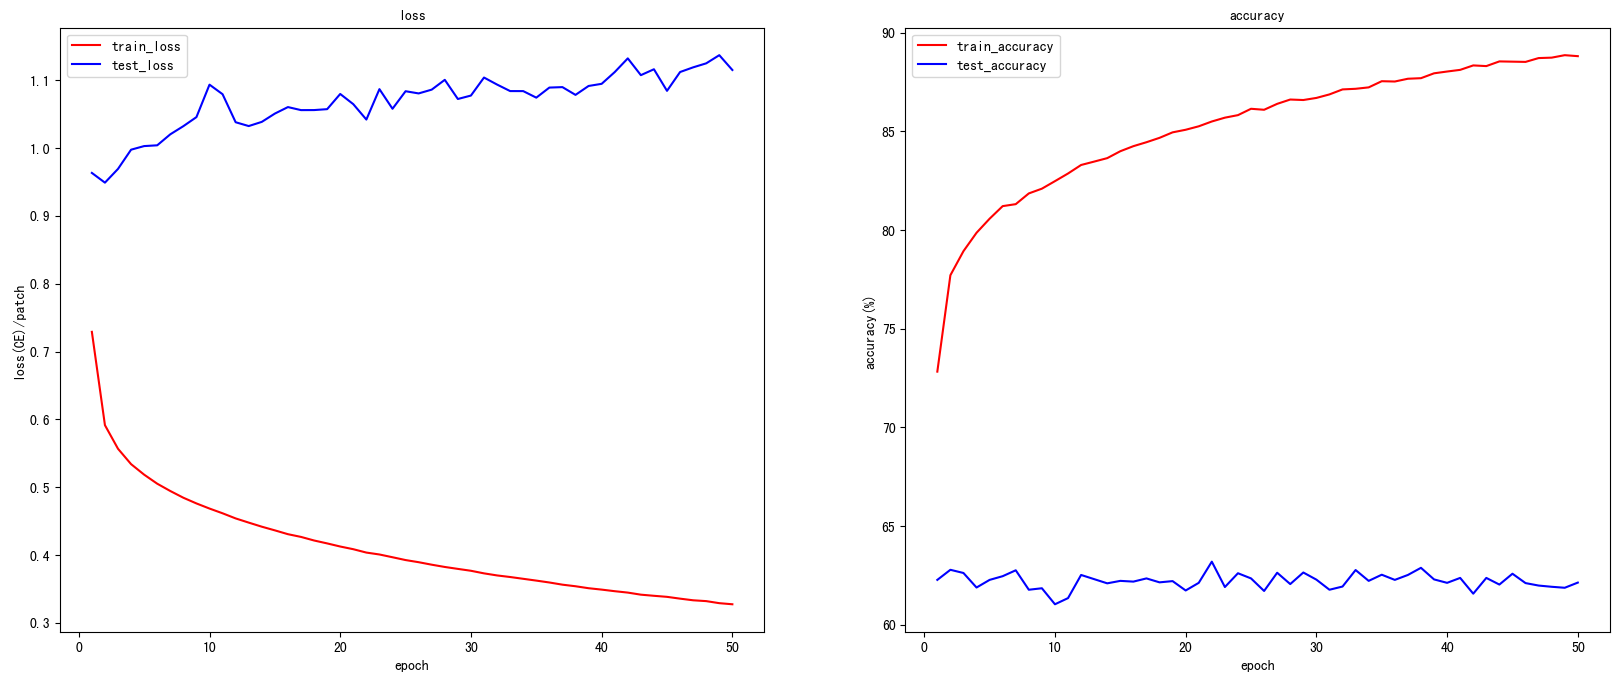

In [6]:
plot_loss_n(50)

In [7]:
for i in range(6):
    idx = i*5
    print("epoch "+str(idx)+":")
    print("accuracy : "+ str(test_accuracy_list[idx]))
    print("loss : "+ str(test_loss_list[idx]))

epoch 0:
accuracy : 62.275449101796404
loss : 0.9632855958626894
epoch 5:
accuracy : 62.462574850299404
loss : 1.0039957014736003
epoch 10:
accuracy : 61.352295409181636
loss : 1.0793173493679888
epoch 15:
accuracy : 62.18812375249501
loss : 1.0603518842044706
epoch 20:
accuracy : 62.125748502994014
loss : 1.0646418980536554
epoch 25:
accuracy : 61.714071856287426
loss : 1.0804847066277663


In [28]:
save_path = '..//Final-Project//model_save//'
state_dict = torch.load(save_path+"Netmix_epoch15.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

## 模型测试

In [29]:
import os
import cv2
import sys
import os.path

In [39]:
def detect(filename, output_name,cascade_file = r"D:\lbpcascade_animeface-master\lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     minNeighbors = 5,
                                     minSize = (24, 24))
    i = 0
    for (x, y, w, h) in faces:
        i+=1
        # 获取脸部识别图像
        image_face = image[y:y+h,x:x+w]
        # 原图标注
        cv2.putText(image, "face"+str(i), (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        out_path = r"..//Final-Project//test//"
        # 不存在文件夹则创建
        if not os.path.exists(out_path):
            os.mkdir(out_path)
        if not os.path.exists(out_path + output_name):
            cv2.imwrite(out_path + output_name, image)
        
        # 转换图像大小，默认双线性插值
        image_face = cv2.resize(image_face,(128,128))
        with torch.no_grad():
            image_face = torch.Tensor(image_face)
            model.cpu()
#             image_face = image_face.to(device)
            image_face = image_face.view(1,3,128,128)
            # 调用模型
            predicts.append(F.softmax(model(image_face)).cpu().numpy().tolist())
    cv2.imshow('image', image)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [40]:
predicts = []
detect("D://jupyter-notebook//ML-Basic-to-improving//Final-Project//test3.jpg","output3.jpg")

C:\Users\Eden_\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [41]:
categories = ['disgust','fear','happy','surprise','sad','angry','neutral']

In [42]:
# predicts: n*(batch_size*categorys)

i = 0
for predict in predicts:
    i+=1
    print("face"+str(i)+": ")
    j = 0
    for category in categories:
        print("{} : {:.2f} %".format(str(category),predict[0][j]*100))
        j+=1

face1: 
disgust : 0.00 %
fear : 0.00 %
happy : 100.00 %
surprise : 0.00 %
sad : 0.00 %
angry : 0.00 %
neutral : 0.00 %
